In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [3]:
df = pd.read_csv('movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
#identifyimg missing values in rows

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [5]:
#dropping off rows with missing rating since its just 1%
df = df.dropna(subset=['rating'])

In [6]:
#replacing missing values of budget and gross rows with their respective median values
df['budget'].fillna(df['budget'].median(), inplace=True)
df['gross'].fillna(df['gross'].median(), inplace=True)

In [7]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [8]:
print(df.dtypes)


name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [9]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [10]:
# Extract the year using a regular expression
df['corrected_year'] = df['released'].str.extract(r'(\d{4})')


In [11]:
print(df['corrected_year'].head())


0    1980
1    1980
2    1980
3    1980
4    1980
Name: corrected_year, dtype: object


In [12]:
df = df.dropna(subset=['corrected_year'])
df['corrected_year'] = df['corrected_year'].astype(int)


In [13]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,corrected_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980


In [14]:
df.sort_values(by=['gross'], inplace=False, ascending=False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,corrected_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,2018


In [15]:
pd.set_option('display.max_rows', None)

In [16]:
#Drop any duplicates

df['company'].drop_duplicates()

0                                            Warner Bros.
1                                       Columbia Pictures
2                                               Lucasfilm
3                                      Paramount Pictures
4                                          Orion Pictures
6                                      Universal Pictures
7                            Chartoff-Winkler Productions
8                                          Dovemead Films
9                                          United Artists
10                                    The Malpaso Company
11                                           C.A.T. Films
14                                      Filmways Pictures
15                                        Rastar Pictures
16                              Metro-Goldwyn-Mayer (MGM)
17                                              IPC Films
18                                  AVCO Embassy Pictures
20                             Lorimar Film Entertainment
21            

In [17]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,corrected_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980


In [18]:
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime', 'corrected_year'],
      dtype='object')

In [19]:
#my guesses
#budget high correlation
#company high correlation
#genre
#score
#votes
#star


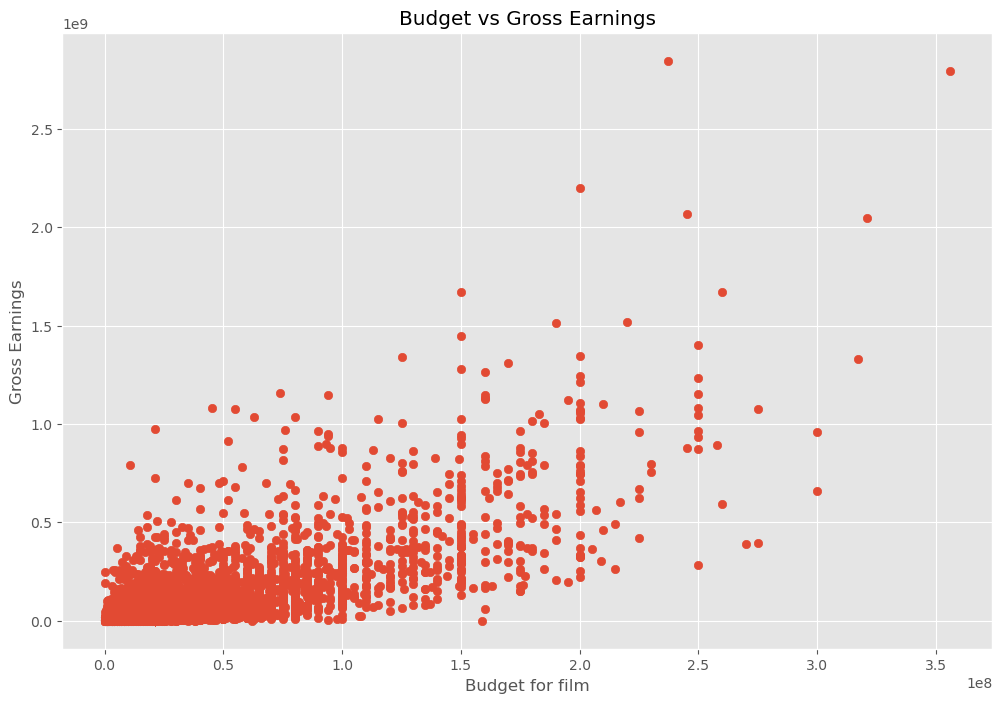

In [20]:
import matplotlib.pyplot as plt

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for film')
plt.ylabel('Gross Earnings')
plt.show()

In [21]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,corrected_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980


In [22]:
# Recast 'budget' and 'gross' columns to float64
df['budget'] = df['budget'].astype('float64')
df['gross'] = df['gross'].astype('float64')

<Axes: xlabel='budget', ylabel='gross'>

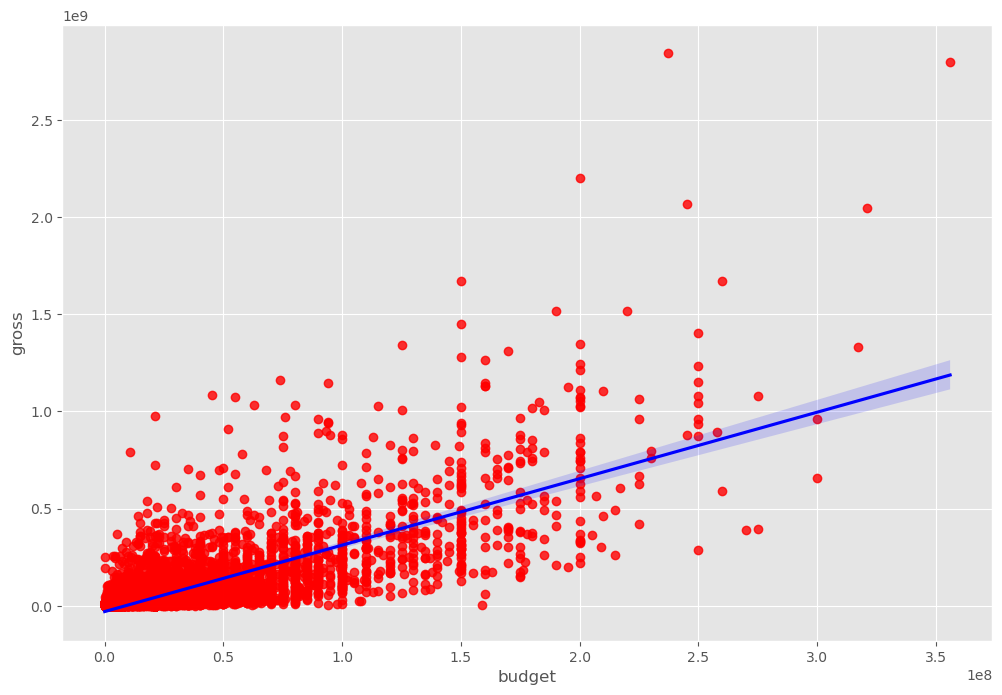

In [23]:
import seaborn as sns

sns.regplot(x="budget", y="gross", data=df,
            scatter_kws={"color": "red"},
            line_kws={"color": "blue"})


In [24]:
# Print data types of each column to identify non-numeric columns
print(df.dtypes)


name               object
rating             object
genre              object
year                int64
released           object
score             float64
votes             float64
director           object
writer             object
star               object
country            object
budget            float64
gross             float64
company            object
runtime           float64
corrected_year      int32
dtype: object


In [25]:
# Drop the 'year' column from the DataFrame
df = df.drop(columns=['year'])


In [26]:
# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=[np.number])

# Display the numeric columns
print(numeric_df.columns)


Index(['score', 'votes', 'budget', 'gross', 'runtime', 'corrected_year'], dtype='object')


In [27]:
# Calculate the correlation matrix for the numeric columns
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)


                   score     votes    budget     gross   runtime  \
score           1.000000  0.412012  0.062911  0.187791  0.400949   
votes           0.412012  1.000000  0.459207  0.632341  0.309664   
budget          0.062911  0.459207  1.000000  0.745667  0.273812   
gross           0.187791  0.632341  0.745667  1.000000  0.244442   
runtime         0.400949  0.309664  0.273812  0.244442  1.000000   
corrected_year  0.111232  0.222464  0.287523  0.255382  0.121238   

                corrected_year  
score                 0.111232  
votes                 0.222464  
budget                0.287523  
gross                 0.255382  
runtime               0.121238  
corrected_year        1.000000  


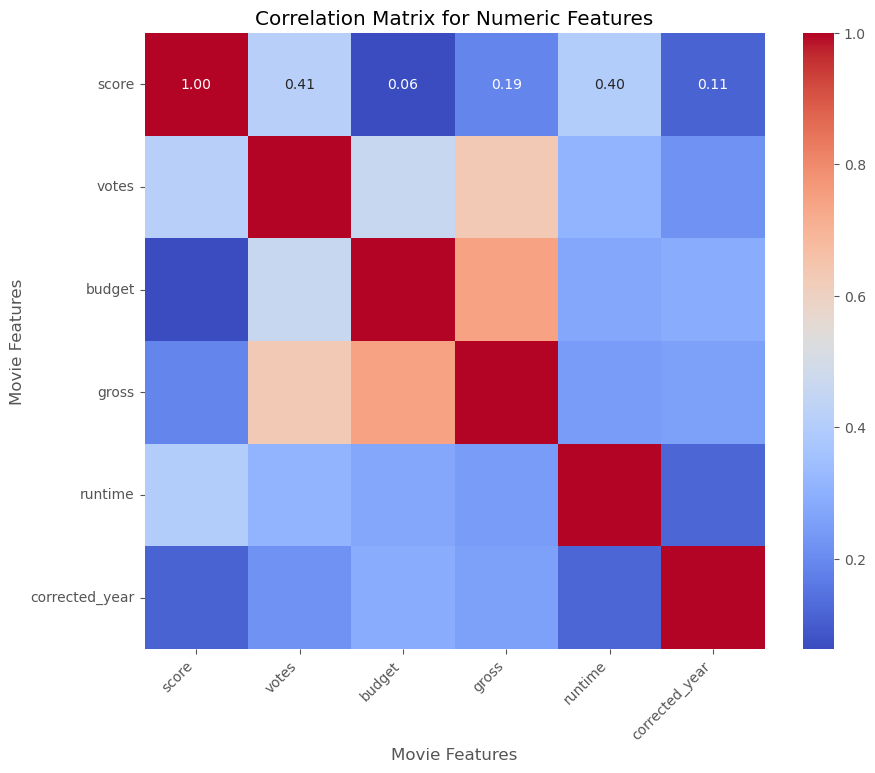

In [28]:
#correlation type is PEARSON

plt.figure(figsize=(10, 8))  # Adjust figure size
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

plt.title("Correlation Matrix for Numeric Features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.show()

In [13]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0


In [29]:
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,corrected_year
0,6519,6,6,1687,8.4,927000.0,2551,3966,1025,54,19000000.0,46998772.0,2277,146.0,1980
1,5510,6,1,1474,5.8,65000.0,2239,1615,316,55,4500000.0,58853106.0,713,104.0,1980
2,5083,4,0,1753,8.7,1200000.0,1095,2538,1713,55,18000000.0,538375067.0,1509,124.0,1980
3,283,4,4,1474,7.7,221000.0,1282,1978,2203,55,3500000.0,83453539.0,1773,88.0,1980
4,1017,6,4,1525,7.3,108000.0,1039,513,398,55,6000000.0,39846344.0,1740,98.0,1980


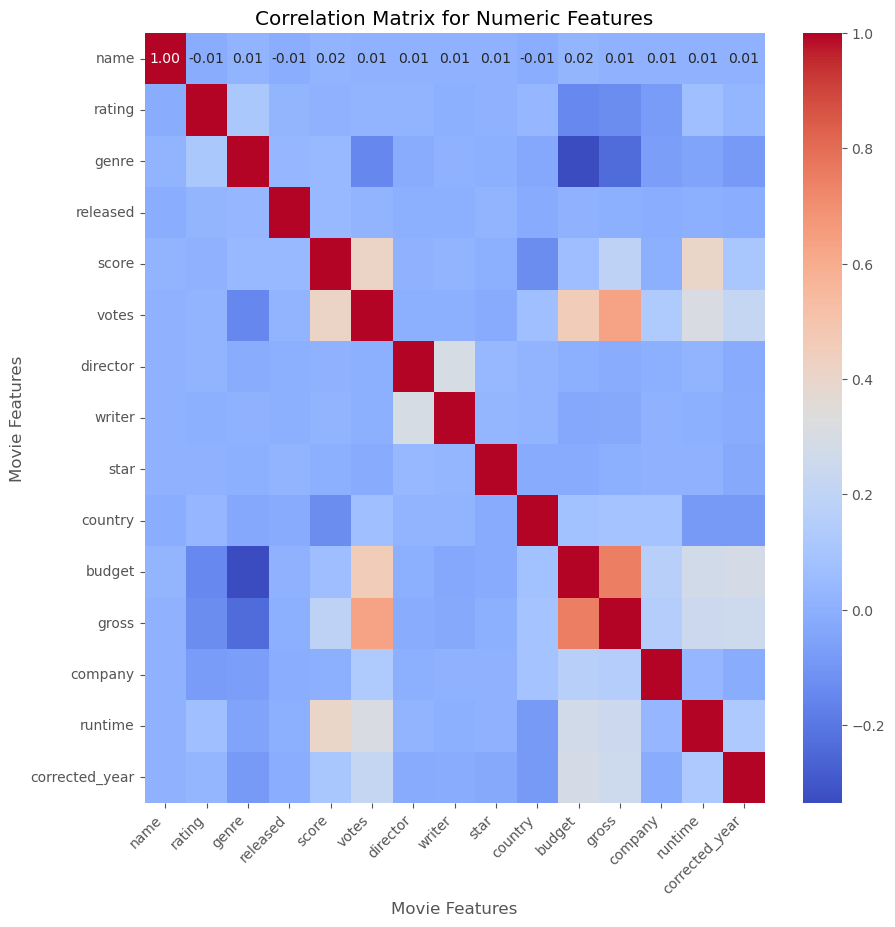

In [46]:
correlation_matrix = df_numerized.corr(method='pearson')

plt.figure(figsize=(10, 10))  # Adjust figure size
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

plt.title("Correlation Matrix for Numeric Features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.show()

In [30]:
df_numerized.copy().head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,corrected_year
0,6519,6,6,1687,8.4,927000.0,2551,3966,1025,54,19000000.0,46998772.0,2277,146.0,1980
1,5510,6,1,1474,5.8,65000.0,2239,1615,316,55,4500000.0,58853106.0,713,104.0,1980
2,5083,4,0,1753,8.7,1200000.0,1095,2538,1713,55,18000000.0,538375067.0,1509,124.0,1980
3,283,4,4,1474,7.7,221000.0,1282,1978,2203,55,3500000.0,83453539.0,1773,88.0,1980
4,1017,6,4,1525,7.3,108000.0,1039,513,398,55,6000000.0,39846344.0,1740,98.0,1980


In [19]:
#Converts the square correlation matrix into a one-dimensional Series 

correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack() 
corr_pairs

name      name        1.000000
          rating     -0.008069
          genre       0.016355
          year        0.011453
          released   -0.011311
          score       0.017097
          votes       0.013088
          director    0.009079
          writer      0.009081
          star        0.006472
          country    -0.010737
          budget      0.023970
          gross       0.005533
          company     0.009211
          runtime     0.010392
rating    name       -0.008069
          rating      1.000000
          genre       0.072423
          year        0.008779
          released    0.016613
          score      -0.001314
          votes       0.033225
          director    0.019483
          writer     -0.005921
          star        0.013405
          country     0.081244
          budget     -0.176002
          gross      -0.107339
          company    -0.032943
          runtime     0.062145
genre     name        0.016355
          rating      0.072423
        

In [20]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget    genre      -0.356564
genre     budget     -0.356564
          gross      -0.235650
gross     genre      -0.235650
rating    budget     -0.176002
budget    rating     -0.176002
genre     votes      -0.145307
votes     genre      -0.145307
score     country    -0.133348
country   score      -0.133348
gross     rating     -0.107339
rating    gross      -0.107339
year      genre      -0.081261
genre     year       -0.081261
country   runtime    -0.078412
runtime   country    -0.078412
company   genre      -0.071067
genre     company    -0.071067
year      country    -0.070938
country   year       -0.070938
runtime   genre      -0.052711
genre     runtime    -0.052711
writer    budget     -0.039451
budget    writer     -0.039451
genre     country    -0.037615
country   genre      -0.037615
company   rating     -0.032943
rating    company    -0.032943
star      year       -0.027242
year      star       -0.027242
writer    gross      -0.023519
gross     writer     -0.023519
year    

In [21]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]
 
print(strong_pairs)

gross     votes       0.630757
votes     gross       0.630757
budget    gross       0.740395
gross     budget      0.740395
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64


In [ ]:
#This analysis examines the relationships between various movie features, highlighting key correlations that may influence a movie's success. 

#Budget vs. Gross Earnings: A strong positive correlation (0.75) indicates that higher-budget films generally earn more at the box office.
#Votes vs. Gross Earnings: A moderately strong correlation (0.63) suggests that movies with more audience votes also tend to have higher earnings.
#Categorical Features:Perfect correlations were observed within features like `name`, `writer`, and `company`, as expected.

#Overall, the findings show that budget and audience engagement are significant predictors of a movie's financial success, 
# while runtime and score have weaker correlations with earnings.